# Quantum Half & Full Adders

In [56]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [57]:
import numpy as np
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
%matplotlib inline
from math import pi, sqrt
import random
from Circuits import getBloch, stateGenerator, getMeasure

In [58]:
backend = Aer.get_backend('statevector_simulator')

In [59]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

1010


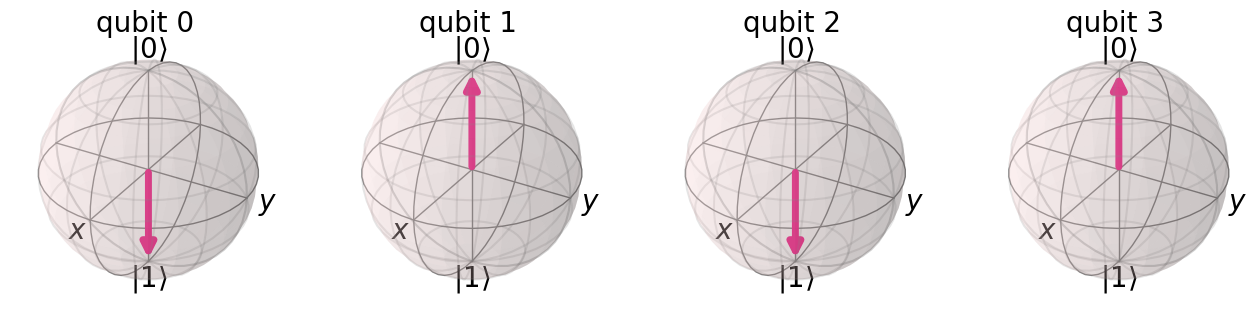

In [60]:
circ = makeCirc(4, 1)
getBloch(circ, backend)

In [61]:
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)

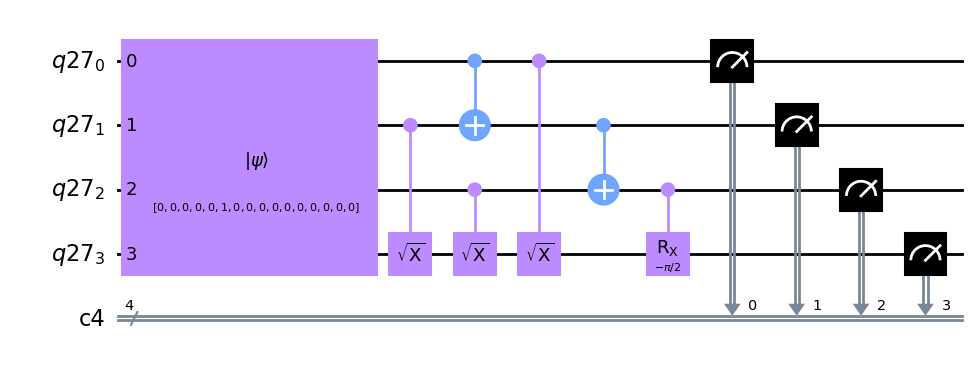

In [62]:
circ.draw('mpl')

In [63]:
getMeasure(circ, 1, backend)[0][::-1]

'1101'

In [64]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

In [65]:
fullAdder = circ.to_gate(label=' Adder')

In [66]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

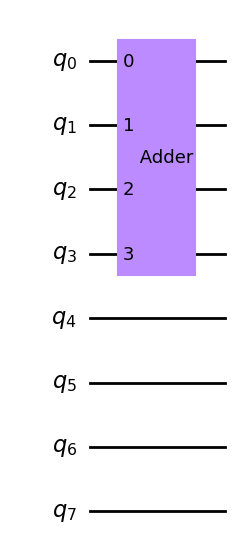

In [67]:
circ2.draw('mpl')